In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
stops_df = pd.read_csv('STOPS_EAGLES_HOME_GAMES.csv')
schedule_df = pd.read_csv('EAGLES_SCHEDULE_CLEANED.csv')

In [5]:
print("--- stops_df Head ---")
print(stops_df.head())
print("\n--- stops_df Info ---")
stops_df.info()
print("\n--- stops_df Description ---")
print(stops_df.describe())

print("\n\n--- schedule_df Head ---")
print(schedule_df.head())
print("\n--- schedule_df Info ---")
schedule_df.info()
print("\n--- schedule_df Description ---")
print(schedule_df.describe())

--- stops_df Head ---
  raw_row_number        date      time                 location        lat  \
0         216366  2014-09-15  00:00:00     1200 BLOCK S 26TH ST  39.938690   
1         320076  2014-09-15  00:00:00    2600 BLOCK N FRONT ST  39.989349   
2         205399  2014-09-15  00:00:00  4400 BLOCK FRANKFORD AV  40.012579   
3         111643  2014-09-15  00:00:00     7100 BLOCK CASTOR AV  40.048152   
4         295845  2014-09-15  00:01:00    N 63RD ST / MASTER ST  39.972184   

         lng  district  service_area  subject_age subject_race  ...  \
0 -75.186919      17.0           172         32.0        black  ...   
1 -75.131270      26.0           261         24.0        white  ...   
2 -75.087572      15.0           151         38.0        white  ...   
3 -75.069087       2.0            23         24.0        black  ...   
4 -75.244937      19.0           192         28.0        black  ...   

  arrest_made outcome  contraband_found frisk_performed search_conducted  \
0     

## Data Preparation and Merging

Convert the 'date' column in `stops_df` and the 'FullDate' column in `schedule_df` to datetime objects. Filter `schedule_df` to include only Eagles home games. Then, merge `stops_df` with the filtered `schedule_df` on their respective date columns to combine traffic stop data with specific game details.

In [7]:
stops_df['date'] = pd.to_datetime(stops_df['date'])
schedule_df['FullDate'] = pd.to_datetime(schedule_df['FullDate'])

eagles_home_games_df = schedule_df[schedule_df['Home'] == 1]

merged_df = pd.merge(stops_df, eagles_home_games_df, left_on='date', right_on='FullDate', how='inner')


--- merged_df Head ---
  raw_row_number       date      time                 location        lat  \
0         216366 2014-09-15  00:00:00     1200 BLOCK S 26TH ST  39.938690   
1         320076 2014-09-15  00:00:00    2600 BLOCK N FRONT ST  39.989349   
2         205399 2014-09-15  00:00:00  4400 BLOCK FRANKFORD AV  40.012579   
3         111643 2014-09-15  00:00:00     7100 BLOCK CASTOR AV  40.048152   
4         295845 2014-09-15  00:01:00    N 63RD ST / MASTER ST  39.972184   

         lng  district  service_area  subject_age subject_race  ... Week  Day  \
0 -75.186919      17.0           172         32.0        black  ...    2  Mon   
1 -75.131270      26.0           261         24.0        white  ...    2  Mon   
2 -75.087572      15.0           151         38.0        white  ...    2  Mon   
3 -75.069087       2.0            23         24.0        black  ...    2  Mon   
4 -75.244937      19.0           192         28.0        black  ...    2  Mon   

    FullDate  FullTime Home

## Visualize Stop Outcomes

create bar chart to visualize the distribution of stop outcomes, specifically focusing on the percentage of stops that resulted in an arrest made and/or contraband found during Eagles home games.


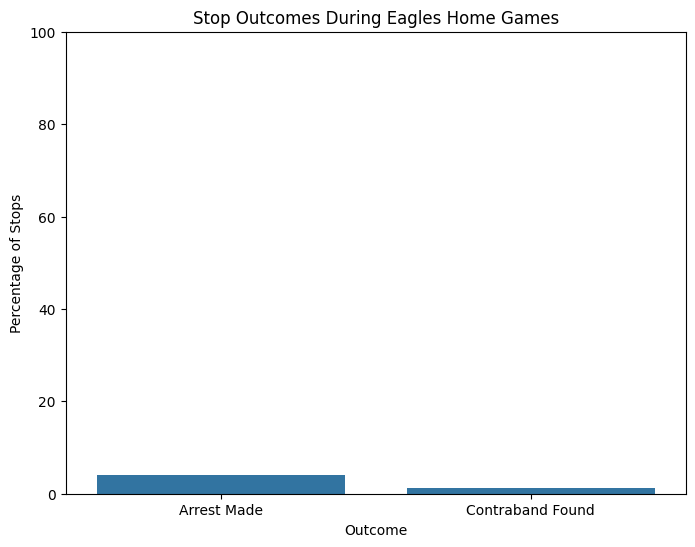

In [8]:
arrest_made_percentage = (merged_df['arrest_made'].sum() / len(merged_df)) * 100
contraband_found_percentage = (merged_df['contraband_found'].sum() / len(merged_df)) * 100

outcomes_data = pd.DataFrame({
    'Outcome': ['Arrest Made', 'Contraband Found'],
    'Percentage': [arrest_made_percentage, contraband_found_percentage]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Percentage', data=outcomes_data)
plt.title('Stop Outcomes During Eagles Home Games')
plt.ylabel('Percentage of Stops')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100
plt.show()

## Visualize Stops by Driver Demographics (Race and Gender)




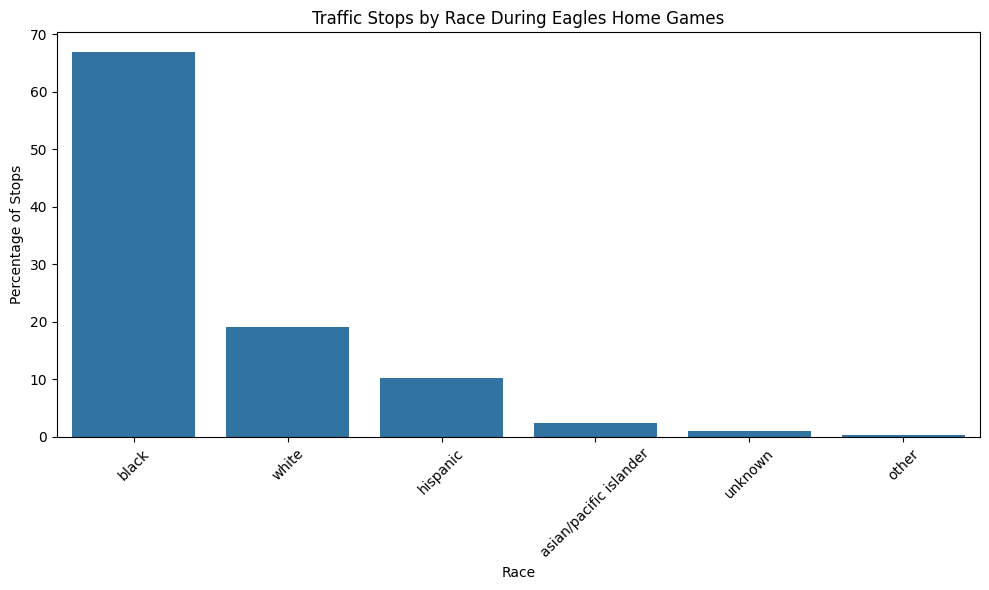

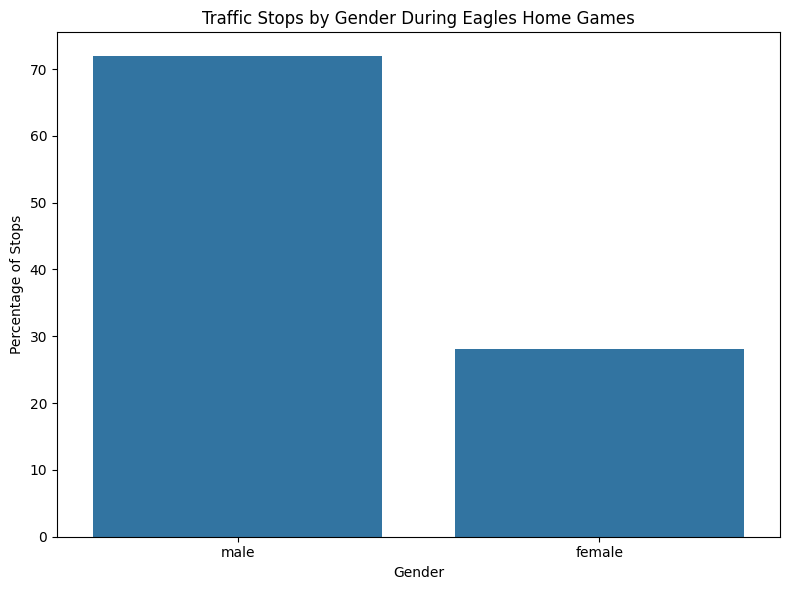

In [10]:
race_distribution = merged_df['subject_race'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=race_distribution.index, y=race_distribution.values)
plt.title('Traffic Stops by Race During Eagles Home Games')
plt.xlabel('Race')
plt.ylabel('Percentage of Stops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

gender_distribution = merged_df['subject_sex'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Traffic Stops by Gender During Eagles Home Games')
plt.xlabel('Gender')
plt.ylabel('Percentage of Stops')
plt.tight_layout()
plt.show()

## Visualize Hourly Stop Distribution

### Subtask:
Generate a line plot showing the count of traffic stops per hour of the day for all Eagles home game days combined.


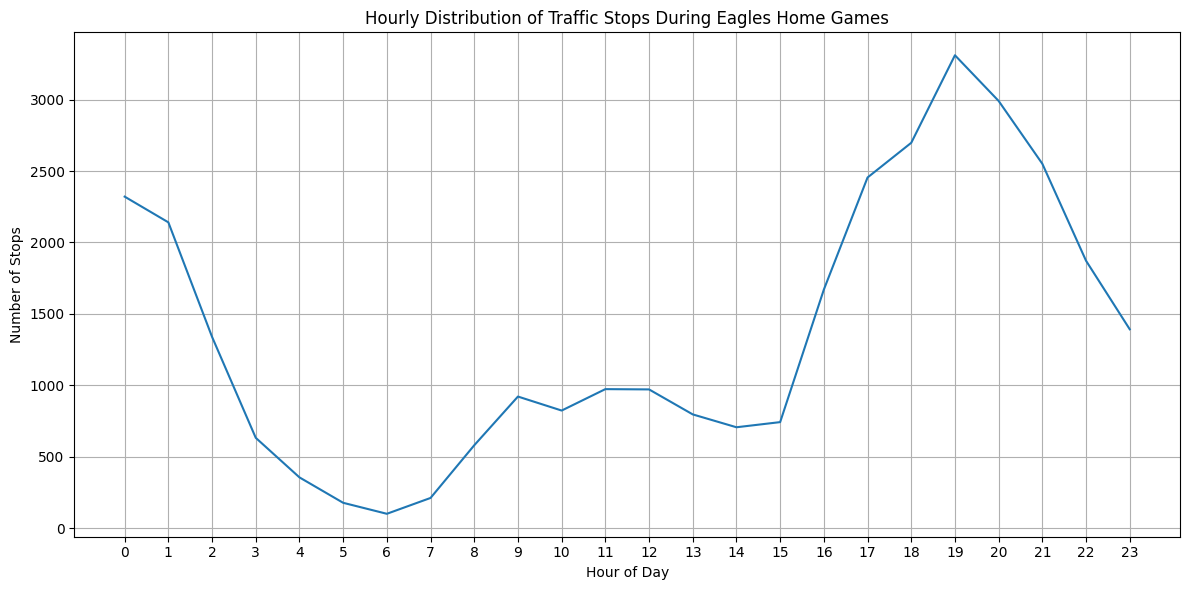

In [13]:
merged_df['stop_hour'] = pd.to_datetime(merged_df['time'], format='%H:%M:%S').dt.hour

hourly_stops = merged_df['stop_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_stops.index, y=hourly_stops.values)
plt.title('Hourly Distribution of Traffic Stops During Eagles Home Games')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Stops')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()